In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import *
import scipy.special
import copy
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

Please sign below:

I, the undersigned, hereby pledge that all work on this examination is my own. I have neither given assistance to any other student, nor received assistance from any other student. I understand that cheating on this examination will result in a failure as well as being reported to San Diego State University’s Division of Academic Affairs.	

Name: Malida Hecht

**Problem 1** (7 points)
Go to Bureau of labor statistics data site: (https://data.bls.gov/cgi-bin/surveymost?cw ) and download the consumer price index (CPI) for Los Angeles as a spreadsheet.

a) (2 points) Plot CPI against month for year 2019 as a scatter plot (use black marker).

b) (5 points) Fit a cubic spline to the data.




**Problem 1a**

Text(0, 0.5, 'CPI')

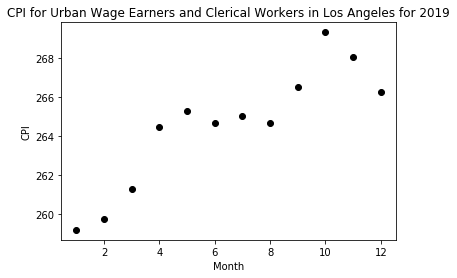

In [2]:
cpi = np.array([259.182, 259.734,261.278,264.469,265.283,264.640,265.012,264.687,266.517,269.314,268.041,266.274])
month = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
plt.plot(month,cpi,'o',c= 'k')
plt.title('CPI for Urban Wage Earners and Clerical Workers in Los Angeles for 2019')
plt.xlabel('Month')
plt.ylabel('CPI')

**Problem 1b**

In [3]:
def cubic_spline(exes,effs,qews):
    n = effs.size - 1
    df = effs[1:]-effs[0:n]
    dx = exes[1:]-exes[0:n]
    dfdx = df/dx
    eses = np.zeros(qews.size)
    
    right = dfdx[1:] - dfdx[0:n-1]
    diagonal = 2./3.*(dx[1:] + dx[0:n-1])
    
    data = np.array([diagonal,dx[1:]/3.,dx[0:n-1]/3.])
    dees = np.array([0,-1,1])
    Bmatrix = spdiags(data, dees, n-1, n-1)
    bvector = spsolve(Bmatrix,right)
    bvector = np.append(0.,bvector)
    
    cvector = dfdx - 2./3.*dx*bvector - dx/3.*np.append(bvector[1:],0.)
    avector = (dfdx - dx*bvector - cvector)/(dx**2.)
    
    for j in range(1,n+1):
        
        indsright = qews < exes[j] 
        indsleft = qews >= exes[j-1]
        inds = indsleft*indsright
        
        dxloc = qews[inds] - exes[j-1]
        eses[inds] = avector[j-1]*dxloc**3. + bvector[j-1]*dxloc**2. + cvector[j-1]*dxloc + effs[j-1]
        
    return eses

C:\Users\Malida\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Text(0, 0.5, 'CPI')

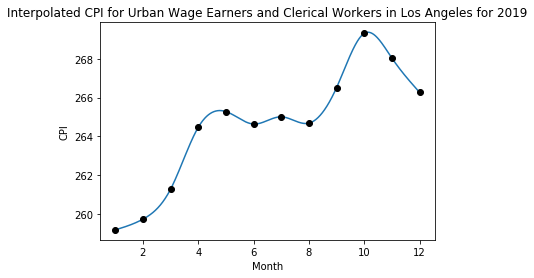

In [4]:
interpvals = np.linspace(1.0001,11.9999,int(1e3))
finterp = cubic_spline(month,cpi,interpvals)
plt.plot(interpvals,finterp)
plt.plot(month,cpi,'o',c= 'k')
plt.title('Interpolated CPI for Urban Wage Earners and Clerical Workers in Los Angeles for 2019')
plt.xlabel('Month')
plt.ylabel('CPI')

**Problem 2** (14 points)
Look up and download the `closing values` of Dow Jones Industrial Average (DJIA) from April 20 - 24, 2020.
https://www.wsj.com/market-data/quotes/index/DJIA/historical-prices

Using an interpolation, try to predict the `opening value` on Tuesday April 21, 2020.

a) (12 points) Compare the prediction from the different interpolation methods (i.e. Cubic Spline, Newton's divided difference polynomial interpolation and Lagrange Interpolation). 

b) (2 points) Compare the prediction from the different interpolation methods to the real opening value on Tuesday April 21, 2020. Identify the method that produces the best prediction and state why it performs the best for this problem.

You must show work including codes to receive credit

**Hint:** The value of DJIA is based on stock prices, so the index value will only change when the U.S. stock exchanges are open. The U.S. stock exchanges are open from 9:30 a.m. to 4:00 p.m. ET, Monday through Friday.




**Problem 2a**

| Date | Opening Value | Closing Value | Opening Time | Closing Time|
|:-------: |:-------: | :--------:| :--------: | :--------:|
|4/20/2020| 24095.10|23650.44 |09:30 | 16 |
|4/21/2020| 23365.25|23018.88 |33:30 | 40 |
|4/22/2020| 23437.34|23475.82 |57:30 | 64 |
|4/23/2020| 23543.09|23515.26 |81:30 | 88 |
|4/24/2020| 23628.24|23775.27 |105:30| 112|

*time is given in hours:minutes

In [5]:
closing = np.array([23650.44,23018.88,23475.82,23515.26,23775.27])
times_closing = np.array([16,40,64,88,112])
opening = np.array([24095.10,23365.25,23437.34, 23543.09, 23628.24])
times_opening =np.array([9.5,33.5, 57.5, 81.5,105.5])

**Cubic Splines**

In [6]:
s_interp = np.linspace(16.0000001,111.99999,193)
s_effs =  cubic_spline(times_closing,closing,s_interp)

C:\Users\Malida\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Interpolated opening value for 4/21 is 23078.84


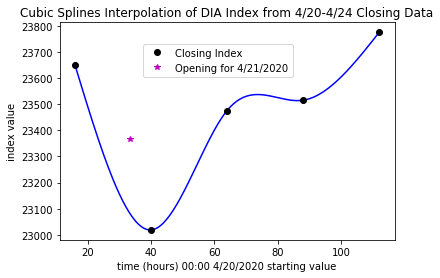

In [7]:
plt.plot(s_interp,s_effs,c = 'b')
plt.plot(times_closing,closing,'o',c= 'k', label = 'Closing Index')
plt.plot(33.5,23365.25,'*',label = 'Opening for 4/21/2020', c = 'm')
plt.legend(loc=(0.25,0.75))
plt.title('Cubic Splines Interpolation of DIA Index from 4/20-4/24 Closing Data')
plt.xlabel('time (hours) 00:00 4/20/2020 starting value')
plt.ylabel('index value')
print('Interpolated opening value for 4/21 is %1.2f' %s_effs[35])

**Newton's Divided Difference**

In [8]:
def newton(x,fx):
    n = len(x)
    matrix = np.zeros([n,n])
    matrix[::,0]= fx
    for j in range(1,n):
        for i in range(n-j):
            matrix[i][j] = (matrix[i+1][j-1] - matrix[i][j-1]) / (x[i+j] - x[i])
    return matrix[0]

def poly(x,fx,x_int):
    coeff = newton(x,fx)
    return coeff[0]+ coeff[1]*(x_int-x[0])+  coeff[2]*(x_int-x[0])*(x_int-x[1])+coeff[3]*(x_int-x[0])*(x_int-x[1])*(x_int-x[2])+coeff[4]**(x_int-x[0])*(x_int-x[1])*(x_int-x[2])*(x_int-x[3])


Interpolated opening value for 4/21 is 23019.45


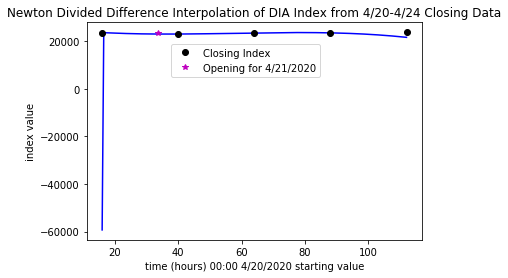

In [9]:
n_interp = np.linspace(16,112, 193)
n_effs = poly(times_closing,closing,n_interp)
plt.plot(n_interp,n_effs,c = 'b')
plt.plot(times_closing,closing,'o',c= 'k', label = 'Closing Index')
plt.plot(33.5,23365.25,'*',label = 'Opening for 4/21/2020', c = 'm')
plt.legend(loc=(0.25,0.75))
plt.title('Newton Divided Difference Interpolation of DIA Index from 4/20-4/24 Closing Data')
plt.xlabel('time (hours) 00:00 4/20/2020 starting value')
plt.ylabel('index value')

print('Interpolated opening value for 4/21 is %1.2f' %n_effs[35])

**Lagrange Interpolating Polynomial**

In [10]:
def weight(x_i,j,x):
    L_i = np.ones(x.size)
    n = x_i.size
    for i in range(0,n):
        if i !=j:
            L_i *= ((x-x_i[i]) / float(x_i[j]-x_i[i]))
    return L_i

def Lagrange(x_i,f_i,x):
    n = f_i.size
    polynomial_i = np.zeros(x.size)
    for k in range(0,n):
        polynomial_i +=f_i[k]*weight(x_i,k,x)
    return polynomial_i

Interpolated opening value for 4/21 is 22968.54


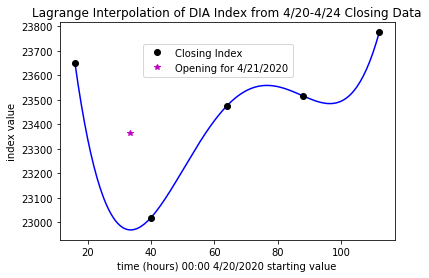

In [11]:
l_interp = np.linspace(16,112,193)
l_effs = Lagrange(times_closing,closing,l_interp)
plt.plot(l_interp,l_effs,c = 'b')
plt.plot(times_closing,closing,'o',c= 'k', label = 'Closing Index')
plt.plot(33.5,23365.25,'*',label = 'Opening for 4/21/2020', c = 'm')
plt.legend(loc=(0.25,0.75))
plt.title('Lagrange Interpolation of DIA Index from 4/20-4/24 Closing Data')
plt.xlabel('time (hours) 00:00 4/20/2020 starting value')
plt.ylabel('index value')
print('Interpolated opening value for 4/21 is %1.2f' %l_effs[35])

**Problem 2b**

In [12]:
err1 = np.abs(opening[2]-s_effs[35])
err2 = np.abs(opening[2]-n_effs[35])
err3 = np.abs(opening[2]-l_effs[35])
print('Absolute Error from Cubic Spline Interpolation is: %1.4f'%err1)
print('Absolute Error from Newtons Divided Difference Interpolation is: %1.4f'%err2)
print('Absolute Error from Lagrange Interpolation is: %1.4f'%err3)

Absolute Error from Cubic Spline Interpolation is: 358.5038
Absolute Error from Newtons Divided Difference Interpolation is: 417.8853
Absolute Error from Lagrange Interpolation is: 468.7985


The error from the Cubic Spline interpolation for the opening value of April 21, 2020 is the smallest error, and thus produces the best or closest prediction.

**Problem 3** (10 points)
Write a program to calculate the combinations $C(n,k)$ without using any factorial, where 
$$C(n,k) = \begin{pmatrix} n \\ k\end{pmatrix} := \frac{n!}{k!(n-k)!}.
$$
Use a `for` loop, assume $n\ge k \ge 0$ are integers. 

$$\frac{n!}{k!(n-k)!} = \frac{n(n-1)(n-1) \dots (n-k+1)(n-k)!}{k!(n-k)!}=\frac{n(n-1)(n-1) \dots (n-k+1)}{k!}$$

In [13]:
def combinations(n,k):
    top = 1
    bot = 1
    for j in range(n-k+1,n+1):
        top *= j
    for i in range(1,k+1):
        bot *= i
    return top/bot

In [14]:
combinations(10,4)

210.0

In [15]:
combinations(4,2)

6.0

**Problem 4** (15 points) There are many methods for finding numerical solutions to differential equations of the form $y'=f(x,y)$, an example is the following formula:
$$y_{n+1} = y_n + \frac{1}{6}(k_1 +2k_2+2k_3+k_4)$$
where 
\begin{align}
k_1 &= hf(x_n,y_n)\\
k_2 &= hf(x_n+ 0.5h,y_n+0.5k_1)\\
k_3 &=hf(x_n+0.5h,y_n+0.5k_2)\\
k_4 &= hf(x_n+h,y_n+k_3)
\end{align}

You are advised to look carefully at the formula; note that $k_2$ depends on $k_1$, $k_3$ depends on $k_2$, and $k_4$ depends on $k_3$. The program you implement in part (a) will use the formula above to compute the approximate solution of the differential equation $y'=2xy$.


(a) (10 points) The value of $x_n$ for $n=0 \cdots 5$ is given in the table below:

| $x_0$  |  $x_1$ |  $x_2$ |  $x_3$|  $x_4$  |  $x_5$ |
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
 | 1 | 1.1 | 1.2| 1.3  | 1.4 | 1.5 |
 
Suppose that $y_0=1$, $h=0.1$, $f(x,y) = 2xy$, write a program to compute the value of $y_n$ for $n=0 \cdots 5$. Use the formula for $y_{n+1}$ above. Observe that the formula for $y_{n+1}$ is a recursive relation.


(b)(3 points) The global truncation error for the formula above is:

$$ \text{error} = Y^{(5)}(c)\frac{h^5}{5!},$$
where $Y(x) = e^{x^2-1}$  is the exact solution of the differential equation $y'=2xy$. 

Calculate the global truncation error for the method. Use $h=0.1$ and $c=1.5$. Note  that $Y^{(5)}$ represents the fifth derivative of $Y(x)$. 

**Hint:** The following code can be used to find the derivative of the function $Y(x)$

`x = Symbol('x')
Y = exp(x**2 -1)
Yprime=diff(Y, x)
print(Yprime)`

(c) (2 points)Compare the exact solution $Y(x) = e^{x^2-1}$ at $x=x_n$ for $n=0 \cdots 5$ to your computed solution from part (a) by plotting both on the same graph. Describe your observation(s).  

**Problem 4a**

In [16]:
def diffeq(x,n,h,y0,f):
    y = np.array([y0])
    for i in range(0,n):
        k1 = h* f(x[i],y[i])
        k2 = h* f(x[i]+0.5*h, y[i]+0.5*k1)
        k3 = h* f(x[i]+0.5*h, y[i]+0.5*k2)
        k4 = h* f(x[i]+h, y[i]+0.5*k3)
        ynp1 = y[i] + (1/6)* (k1+ 2*k2+2*k3+k4)
        y = np.append(y,ynp1)
    return y[n]
    

In [17]:
ex = np.array([1,1.1,1.2,1.3,1.4,1.5])
f = lambda x,y: 2*x*y
enns = np.array([0,1,2,3,4,5])
approx = np.array([diffeq(ex,j,0.1,1,f) for j in enns])
print(approx)

[1.         1.22937968 1.54091312 1.96904299 2.56505372 3.40629069]


**Problem 4b**

In [18]:
x = Symbol('x')
Y = exp(x**2 -1)
dy = diff(Y, x)
d2y = diff(dy,x)
d3y = diff(d2y,x)
d4y = diff(d3y,x)
d5y = diff(d4y,x)
def trunc_err(y5prime,c,h):
    return d5y * c * h**5 / np.math.factorial(5)
err = trunc_err(d5y,1.5,0.1)
print(err)
print()
error = lambda X:4.0e-6*X**5*np.exp(X**2 - 1) + 2.0e-5*X**3*np.exp(X**2 - 1) + 1.5e-5*X*np.exp(X**2 - 1)
err_vector = [error(i) for i in ex]
print(err_vector)

4.0e-6*x**5*exp(x**2 - 1) + 2.0e-5*x**3*exp(x**2 - 1) + 1.5e-5*x*exp(x**2 - 1)

[3.9e-05, 6.114360135469853e-05, 9.706482110882033e-05, 0.00015609141828831812, 0.0002543608501682386, 0.0004201500335044692]


**Problem 4c**

The error when n = 0 is: 0.000000
The error when n = 1 is: 0.004298
The error when n = 2 is: 0.011794
The error when n = 3 is: 0.024673
The error when n = 4 is: 0.046643
The error when n = 5 is: 0.084052


Text(0.5, 0, 'x')

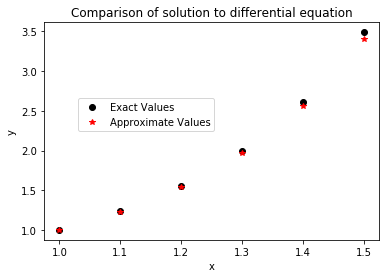

In [19]:
y_exact = lambda x: np.exp(x**2 - 1)
whys = y_exact(ex)

for j in range (0,6):
    print('The error when n = %d is: %f' %(j,(np.abs(whys[j]-approx[j]))))

plt.plot(ex,whys,'o',label = 'Exact Values',c = 'k')
plt.plot(ex,approx,'*', label ="Approximate Values",c= 'r')
plt.legend(loc=(0.1,0.5))
plt.title('Comparison of solution to differential equation')
plt.ylabel('y')
plt.xlabel('x')

**Problem 5** (15 points): 

Let $K$ be the maximum value of $\left \lvert f^{(4)}(x)\right\rvert$ on an interval $[a,b]$, then the error bound for Simpson method $E_S$ is: 

$$E_S = \left\lvert \int_a^b f(x) \ dx - S_n  \right\rvert \leq \frac{(b-a)^5 K }{180 \ n^4}$$

Let $f(x) = \cos(x-x^2)$, 

(a) (5 points) Write a program to compute the maximum value of $\left \lvert f^{(4)}(x)\right\rvert$ on an interval $[0,1]$. Note that $f^{(4)}(x)$ represents the fourth derivative of the function $f(x)$.

(b) (2 points) How large must the value of $n$ be in the approximation $S_n$ of $\int_0^1 f(x) \ dx$ by Simpson's rule to ensure that the absolute error is less than $10^{-4}$?

(c) (4 points) Write a program to compute the integral $\int_0^1 f(x) \ dx$  using Simpson's method with the value of $n$ obtained in part (b).

(d) (2 points) Write down the exact solution for $\int_0^1 f(x) \ dx$ (you don't need to show work for how you computed the exact integral).

(e)(2 points) Compare the exact solution from part (d) to the computed solution from part (c). Does it agree with you estimates in part (b)?





**Problem 5a**

In [20]:
x = Symbol('x')
f = cos(x-x**2)
df = diff(f, x)
d2f = diff(df,x)
d3f = diff(d2f,x)
d4f = diff(d3f,x)
d5f = diff(d4f,x)
print(d5f)


(1 - 2*x)*(2 - 4*x)*(2*x - 1)*cos(x**2 - x) + 2*(1 - 2*x)*(4 - 8*x)*(2*x - 1)*cos(x**2 - x) + (1 - 2*x)*(2*x - 1)**4*sin(x**2 - x) - 6*(1 - 2*x)*(2*x - 1)**2*cos(x**2 - x) + 4*(2*x - 1)**3*cos(x**2 - x) + 12*(2*x - 1)*sin(x**2 - x) + 2*(8*x - 4)*sin(x**2 - x) + 5*(16*x - 8)*sin(x**2 - x)


In [21]:
d5y = lambda X: (1 - 2*X)*(2 - 4*X)*(2*X - 1)*np.cos(X**2 - X) + 2*(1 - 2*X)*(4 - 8*X)*(2*X - 1)*np.cos(X**2 - X)\
    + (1 - 2*X)*(2*X - 1)**4*np.sin(X**2 - X) - 6*(1 - 2*X)*(2*X - 1)**2*np.cos(X**2 - X) + 4*(2*X - 1)**3*np.cos(X**2 - X)\
    + 12*(2*X - 1)*np.sin(X**2 - X) + 2*(8*X - 4)*np.sin(X**2 - X) + 5*(16*X - 8)*np.sin(X**2 - X)

In [22]:
def root_finder(f,a,b,tol):
    f_a = f(a)
    f_b = f(b)
    a1=a
    b1=b
    if f_a*f_b<0:
        c=(a+b)/2
        guesses = np.array([c])
        f_c = f(c)
        while np.abs(f_c)>=tol:
            if f_a*f_c<0:
                b1=c
            else:
                a1=c
            c=(a1+b1)/2
            guesses=np.append(guesses,c)
            f_c = f(c)
        return c
    else:
        return

In [23]:
print(d4f)

(1 - 2*x)*(4 - 8*x)*sin(x**2 - x) - (1 - 2*x)*(2*x - 1)**3*cos(x**2 - x) - (2 - 4*x)*(2*x - 1)*sin(x**2 - x) - (4 - 8*x)*(2*x - 1)*sin(x**2 - x) + 2*(2*x - 1)**2*sin(x**2 - x) - 12*cos(x**2 - x)


In [24]:
d4y = lambda X: (1 - 2*X)*(4 - 8*X)*np.sin(X**2 - X) - (1 - 2*X)*(2*X - 1)**3*np.cos(X**2 - X) \
    - (2 - 4*X)*(2*X - 1)*np.sin(X**2 - X) - (4 - 8*X)*(2*X - 1)*np.sin(X**2 - X) \
    + 2*(2*X - 1)**2*sin(X**2 - X) - 12*np.cos(X**2 - X)

In [25]:
x_max = root_finder(d5y,0,1,1e-4)
max_val = np.abs(d4y(x_max))
print('The maximum value of the absolute value of the 4th derivative is: %f'%max_val)

The maximum value of the absolute value of the 4th derivative is: 11.626949


**Problem 5b**


Given that $$E_S = \left\lvert \int_a^b f(x) \ dx - S_n  \right\rvert \leq \frac{(b-a)^5 K }{180 \ n^4}$$
We want our error to be less than $10^{-4}$, thus
$$E_S = \left\lvert \int_a^b f(x) \ dx - S_n  \right\rvert \leq \frac{(b-a)^5 K }{180 \ n^4}<10^{-4}$$
We can solve for n:
$$\begin{aligned}
\frac{(b-a)^5 K }{180 n^4}&<10^{-4}\\
\frac{(1-0)^5 (11.62694)}{180  n^4}&<10^{-4}\\
\frac{(11.62694)}{180  n^4}&<10^{-4}\\
\frac{(11.62694)}{180 \times 10^{-4}}&<n^4\\
\end{aligned}$$

In [26]:
max_val/180*1e4


645.941614473763

$$\begin{aligned}
645.9416<n^4\\
\end{aligned}$$

In [27]:
(max_val/180*1e4)**(1/4)

5.04136702238805

$$5.041367<n$$
Then, n must be at least 6 so that the error is less than $10^{-4}$. 

**Problem 5c**

In [28]:
eff = lambda x: np.cos(x-x**2)

def simpson_integration(a,b,n,f):
    if n%2==0:
        exes = np.linspace(a,b,int(n+1))
        funcs = f(exes)
        dx = (b-a)/n
        return dx/3.*(funcs[0] + funcs[int(n)] + 2.*np.sum(funcs[2:int(n-1):2]) + 4.*np.sum(funcs[1:int(n):2])) 
    else:
        print("n is not even!")
integral = simpson_integration(0,1,6,eff)
print(integral)

0.9833474161740273


**Problem 5d**

$$\int_0^1 f(x) \ dx= \int_0^1\cos(x-x^2) dx=0.9833993553876422$$

**Problem 5e**

In [29]:
err = np.abs(0.9833993553876422-integral)
print('The error computed is %e'%err)

The error computed is 5.193921e-05


This is less than $10^{-4}$ and is consistent with our estimate in part (b).

**Problem 6** (10 points): 
A particle moves along a line so that its velocity at time $t$ is $v(t) = t^2 -t-6$ (measured in meters per second).

Using trapezoid method, find the distance travelled from t=1 to t=4.



In [30]:
vel = lambda t: t**2 - t - 6
def trapezoid(a,b,n,f):
    exes = np.linspace(a,b,int(n+1))
    effs = f(exes)
    dx = (b-a)/n
    return dx/2.*(effs[0] + effs[int(n)] + 2.*np.sum(effs[1:int(n)])) 
position = trapezoid(1,4,1e3,vel)
print('The particle traveled %f m'%position)


The particle traveled -4.499995 m


**Problem 7 (10 points)**: - Using the Taylor series, 
$$
e^{x} = \sum_{j=0}^{\infty} \frac{x^{j}}{j!}
$$


(a) (2 points) Derive a Taylor series for $e^{-x^2}$ around $x=0$.  
(b) (5 points) Write a code which computes the Taylor series of $e^{-x^2}$ using recursion and a tolerance based while loop approach.

(c) (3 points)  On the interval $[0,5]$, plot the semi-log error in your approximation for tolerance values $10^{-1}$, $10^{-2}$, and $10^{-8}$. 


**Problem 7a** 
Given that
$$e^x = \sum_{j=0}^\infty \frac{x^j}{j!}$$
Then for $f(x) = e^{-x^2}$, we can represent $f(x)$ as the Taylor series given:
$$e^{-x^2} = \sum_{j=0}^\infty \frac{(-x^2)^j}{j!}=\sum_{j=0}^\infty \frac{(-1)^jx^{2j}}{j!}$$

**Problem 7b** Using the Taylor series, we can obtain a recursive relation:
$$\begin{aligned}
\frac{a_j}{a_{j-1}}& = \frac{\frac{(-1)^jx^{2j}}{j!}}{\frac{(-1)^{j-1}x^{2(j-1)}}{(j-1)!}}\\
& = \frac{(-1)^jx^{2j}}{j!}\frac{(j-1)!}{(-1)^{j-1}x^{2j-2}}\\
& = -\frac{x^2}{j}\\
a_j &=  -\frac{x^2}{j} a_{j-1}
\end{aligned}$$
and for $j=0$,
$$a_0 = \frac{(-1)^0x^0}{0!} = 1$$
thus,
    $$a_j = \begin{cases} 1, & j = 0 \\ -\frac{x^2}{j} a_{j-1}, & j\geq 0
\end{cases}$$

In [31]:
def gaussian(x,tol):
    aj = np.ones(x.size)
    j = 1
    tot = np.ones(x.size)
    while np.max(np.abs(aj)) >= tol:
        aj *= -1* (x**2)/j
        tot +=aj
        j += 1
    return tot

**Problem 7c**

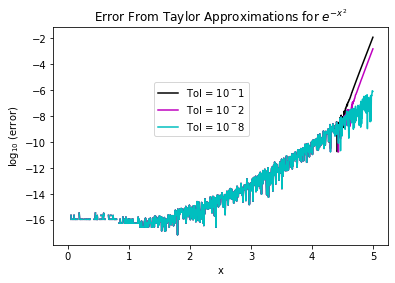

In [32]:
f = lambda x: np.exp(-x**2)
exes = np.linspace(0,5,int(1e3))
effs = f(exes)
approx1 = gaussian(exes,1e-1)
approx2 = gaussian(exes,1e-2)
approx3 = gaussian(exes,1e-8)
err1 = np.ma.log10(np.abs(effs - approx1))
err2 = np.ma.log10(np.abs(effs - approx2))
err3 = np.ma.log10(np.abs(effs - approx3))
plt.plot(exes,err1, label = 'Tol = $10^-1$',c = 'k')
plt.plot(exes,err2, label = 'Tol = $10^-2$',c = 'm')
plt.plot(exes,err3, label = 'Tol = $10^-8$',c = 'c')
plt.title('Error From Taylor Approximations for $e^{-x^2}$')
plt.xlabel('x')
plt.ylabel('$\log_{10}$ (error)')
plt.legend(loc=(0.3,0.5))

**Problem 8 (5 points)**:
 Generate the graph for the following parametric equation for $0 \le \theta \le4\pi$;
 
 $$ x = \left[ 2 + \cos \left(\frac{5\theta}{2}\right) \right] \cos \theta, \quad  \quad \quad y = \left[ 2 + \cos \left(\frac{5\theta}{2}\right) \right] \sin \theta. $$

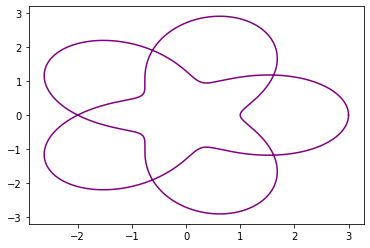

In [33]:
x = lambda theta: (2+ np.cos(5*theta/2))*np.cos(theta)
y = lambda theta: (2+ np.cos(5*theta/2))*np.sin(theta)
thetas = np.linspace(0,np.pi*4,int(1e3))
exes = x(thetas)
whys = y(thetas)
plt.plot(exes,whys, c = 'purple')